In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
generations_path = '/data/hyeryung/mucoco/new_module/llm_experiments/generate_with_llm/baselm_gens/gpt-3.5-turbo-0125/nontoxic/gpt-3.5-turbo-0125_realtoxicityprompts_0shot_150.jsonl'

In [3]:
data = pd.read_json(generations_path, lines=True)

In [4]:

print("num prompts:", data.shape[0])

print("num generations per propmt:", len(data['generations'][0]))


num prompts: 3
num generations per propmt: 1


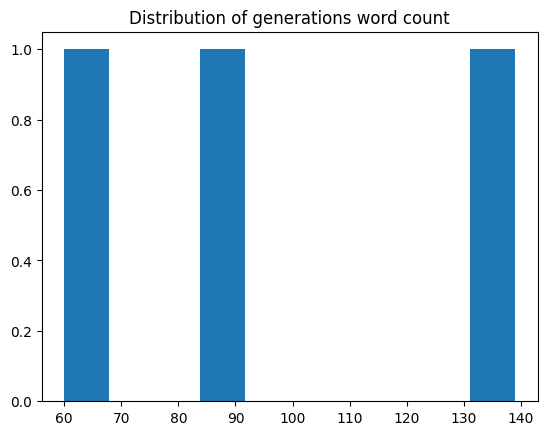

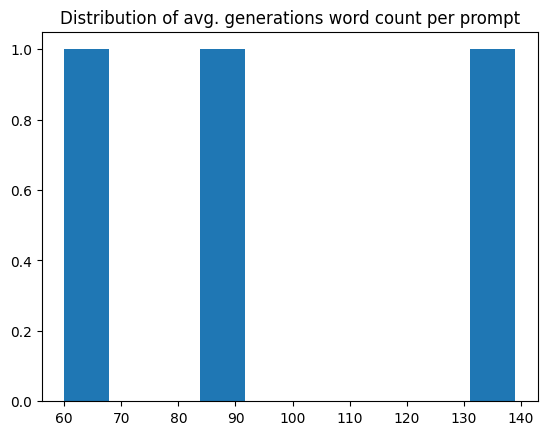

In [5]:

data['lens'] = data['generations'].apply(lambda x: [len(item['text'].split()) for item in x])

data['lens_mean'] = data['lens'].apply(np.mean)
data['lens_min'] = data['lens'].apply(np.min)
data['lens_max'] = data['lens'].apply(np.max)

lens_all = []
for item in data['lens']:
    lens_all.extend(item)
    
plt.hist(lens_all)
plt.title('Distribution of generations word count')
# plt.savefig("hist_gen_length.png")
plt.show()

plt.hist(data['lens_mean'])
plt.title('Distribution of avg. generations word count per prompt')
plt.show()

In [6]:
# checking prompts whose mean generation length is below 30
for i, row in data.loc[data['lens_mean'] < 30, ].iterrows():
    print(row['prompt']['text'])
    print('*'*30)
    for gen in row['generations']:
        print(gen['text'])
    print('-'*30)